In [74]:
from enum import unique
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [11]:
first = pd.read_csv('storage/data_with_groups.csv')
first.group.unique()
first_noduplicates = first.groupby(['REGNUM', 'date', 'group']).sum().reset_index()
first_noduplicates

,REGNUM,date,group,mcc,PRC_AMT
0,913,2020-01-01,food,16321,1424.68
1,913,2020-01-02,food,5814,199.00
2,913,2020-01-02,health,5912,1438.00
3,913,2020-01-02,money,6011,2000.00
4,913,2020-01-03,food,5814,213.00
...,...,...,...,...,...
3469213,4300893,2020-07-17,money,19084,12000.00
3469214,4300893,2020-07-19,health,5912,298.00
3469215,4300893,2020-07-19,money,26144,4600.00
3469216,4300893,2020-07-20,food,5411,1012.70


In [12]:
#make overall consumption
first_overall_consuption = first.groupby(['date', 'group']).sum().reset_index()[['date', 'group', 'PRC_AMT']]
#make for food
df_wide_food=pd.pivot(first_noduplicates[first_noduplicates['group']== 'food'], index=['date'], columns = 'REGNUM',values = 'PRC_AMT').fillna(0) #Reshape from long to wide


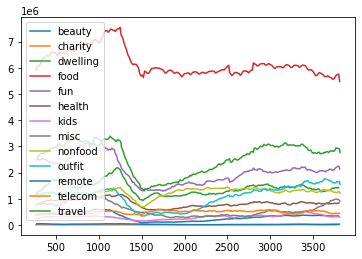

In [13]:
#plot for all categories
for group in first_overall_consuption['group'].unique().tolist():
    if str(group) != 'money':
        plt.plot(first_overall_consuption[first_overall_consuption['group']==str(group)]['PRC_AMT'].rolling(window=20).mean(), label = str(group))
plt.legend()    
plt.show()


In [113]:
#functions
def Norm01(x):
    mi=np.nanmin(x)
    ma=np.nanmax(np.array(x)-mi)
    if ma>0.:
        x_n=(np.array(x)-mi)/ma
        return x_n, mi, ma
    else:
        return np.zeros(len(x)), mi, ma
    
def  MovingAverage(x, numb=10):
    n=len(x)//numb
    ma=list(x[:n])
    for j in range(len(x)-n):
        ma.append(np.mean(x[j:j+n]))
    return np.array(ma)

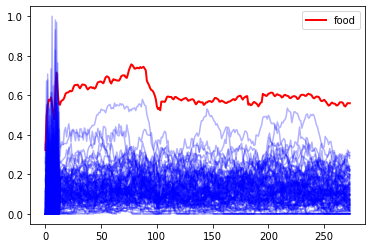

In [15]:
#plot food and all customers

plt.plot(MovingAverage(Norm01(first_overall_consuption[first_overall_consuption['group']=="food"]['PRC_AMT'])[0], numb = 20)\
    ,label = 'food'\
    ,linewidth=2, color='red')

for customer in df_wide_food.columns.tolist()[0:100]:
    plt.plot(MovingAverage(Norm01(df_wide_food[customer])[0], numb = 20), alpha=0.3, color = 'blue')

plt.legend()
plt.show()

In [16]:
#smooth data
df_wide_food_smoothed = df_wide_food.apply(lambda x : MovingAverage(Norm01(x)[0]\
    , numb = 10))


# Clustering

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1453 out of 1453 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4359 out of 4359 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4359 out of 4359 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4359 out of 4359 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4359 out of 4359 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7265 out of 7265 | elapsed:    2.3s finished


0.515 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7265 out of 7265 | elapsed:    2.3s finished


0.312 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7265 out of 7265 | elapsed:    2.3s finished


0.295 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7265 out of 7265 | elapsed:    2.3s finished


0.289 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7265 out of 7265 | elapsed:    2.5s finished


0.287 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7265 out of 7265 | elapsed:    2.4s finished


0.285 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7265 out of 7265 | elapsed:    2.3s finished


0.284 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7265 out of 7265 | elapsed:    2.4s finished


0.284 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7265 out of 7265 | elapsed:    2.3s finished


0.283 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7265 out of 7265 | elapsed:    2.3s finished


0.283 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7265 out of 7265 | elapsed:    2.3s finished
c:\Users\Pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1453 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7265 out of 7265 | elapsed:    2.4s finished


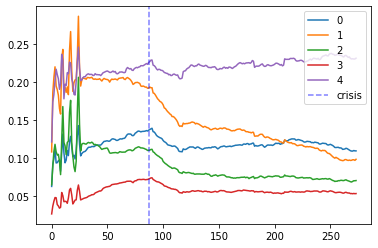

In [10]:
clusters_num = 5

from tslearn.clustering import TimeSeriesKMeans


df_wide_food_smoothed_thin = df_wide_food_smoothed.sample(frac=0.20,axis='columns')

model = TimeSeriesKMeans(n_clusters=clusters_num, metric="dtw",
                         max_iter=10, random_state=2022, verbose=1)

clustered = model.fit(np.array(df_wide_food_smoothed_thin.transpose()))

array_data = np.array(df_wide_food_smoothed_thin.transpose())

clusters = model.predict(np.array(df_wide_food_smoothed_thin.transpose()))

from collections import Counter

len(clusters)
Counter(clusters)


def indexes(iterable, obj):
    return (index for index, elem in enumerate(iterable) if elem == obj)


for group in range(clusters_num):
    
    temp = array_data[list(indexes(clusters.tolist(), group))]
    series = np.mean(temp,axis=0)
    plt.plot(series, label = str(group))


#plt.plot(MovingAverage(Norm01(first_overall_consuption[first_overall_consuption['group']=="food"]['PRC_AMT'])[0], numb = 20)\
#    ,label = 'food'\
#    ,linewidth=2, color='red')

plt.axvline(x=87, color='b', ls='--', alpha=0.5, label='crisis')
plt.legend()
plt.show()


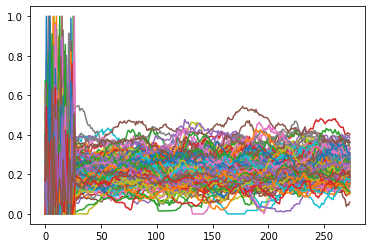

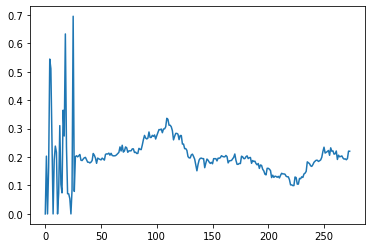

In [11]:
strange_cluster = array_data[list(indexes(clusters.tolist(), 4))]
for i in range(len(strange_cluster)):
    plt.plot(strange_cluster[i])
plt.show()

plt.plot(strange_cluster[10])

## Cut

In [12]:
clusters_num = 5


df_wide_food_smoothed_cut = df_wide_food_smoothed[50:150]

model = TimeSeriesKMeans(n_clusters=clusters_num, metric="dtw",
                         max_iter=10, random_state=2022, verbose=1)

clustered_cut = model.fit(np.array(df_wide_food_smoothed_cut.transpose()))

array_data_cut = np.array(df_wide_food_smoothed_cut.transpose())

clusters_cut = model.predict(np.array(df_wide_food_smoothed_cut.transpose()))

from collections import Counter

len(clusters_cut)
Counter(clusters_cut)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7265 out of 7265 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 21795 out of 21795 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 21795 out of 21795 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 21795 out of 21795 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 21795 out of 21795 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.4s finished


0.103 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.6s finished


0.044 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.6s finished


0.042 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.6s finished


0.040 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.6s finished


0.040 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.7s finished


0.039 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.7s finished


0.038 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.6s finished


0.038 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.6s finished


0.038 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.6s finished


0.038 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.6s finished
c:\Users\Pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 7265 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.5s finished


Counter({4: 2810, 0: 1292, 3: 1794, 1: 553, 2: 816})

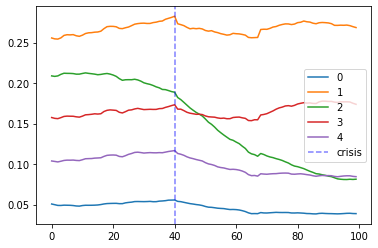

In [14]:
def indexes(iterable, obj):
    return (index for index, elem in enumerate(iterable) if elem == obj)



groups = []
for group in range(5):
    
    temp = array_data_cut[list(indexes(clusters_cut.tolist(), group))]
    series = np.mean(temp,axis=0)
    plt.plot(series, label = str(group))
    groups.append(series)

#plt.plot(MovingAverage(Norm01(first_overall_consuption[first_overall_consuption['group']=="food"]['PRC_AMT'][50:150])[0], numb = 20)\
#    ,label = 'food'\
#    ,linewidth=2, color='red')

plt.axvline(x=40, color='b', ls='--', alpha=0.5, label='crisis')
plt.legend()
plt.show()

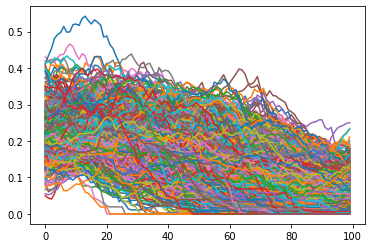

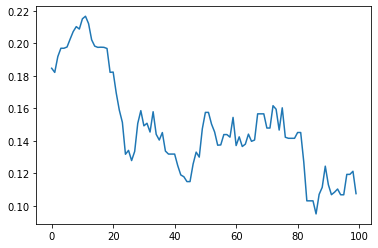

In [15]:
strange_cluster_cut = array_data_cut[list(indexes(clusters_cut.tolist(), 2))]
for i in range(len(strange_cluster_cut)):
    plt.plot(strange_cluster_cut[i])
plt.show()


plt.plot(strange_cluster_cut[30])

### Tests

In [4]:
from Libraries.pymssa import MSSA

import statsmodels.api as sm
import Libraries
from Libraries.Autoregr import VARModel
from Libraries.Util import Norm01
from Libraries.Util import Nback
from Libraries.Util import Metr
from Libraries.Util import MovingAverage

In [5]:
def VARTest(x,y,maxlag=52):
    b=len(x)-6
    fwd=6
    score=200
    lag=0    
    for l in range(maxlag):
        x1,mi,ma=Norm01(x)
        x1=x1[l:]
        y1,_,_=Norm01(y)
        y1=pd.Series(y1).shift(l)[l:]
        vec=pd.DataFrame({'reg':x1, 'prd':y1})
        x_test=Nback(VARModel(vec[:b],fwd), mi,ma)
        d = Metr(x[b:b+fwd], x_test)
        if d[2]<score:
            score=d[2]
            lag=l
    return score, lag

In [18]:
food_overall = MovingAverage(Norm01(first_overall_consuption[first_overall_consuption['group']=="food"]['PRC_AMT'][50:150])[0], numb = 20)

data = pd.DataFrame(np.array(groups).T)
data.columns = [str(x) for x in list(data.columns)]
data['overall'] = food_overall

In [6]:
data = pd.read_csv('storage/5groups.csv')

In [7]:
i = 0
for y in list(data.columns)[0:5]:
    print('group - ', i , 'score = ' ,VARTest(data[str(y)],data['overall'])[0], 'lag = ',\
        VARTest(data[str(y)],data['overall'])[1])
    i+=1

c:\Users\Pablo\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


group -  0 score =  1.4656126705622515e-14 lag =  0
group -  1 score =  1.7365690755897607 lag =  5
group -  2 score =  0.19670436306192968 lag =  5
group -  3 score =  0.3790580044226735 lag =  0
group -  4 score =  0.3497366360104254 lag =  28


#### CrossCorr

In [166]:
def CrossCorr(datax, datay, maxlag=52):
    ccor=0
    lag=0
    dx=pd.Series(datax)
    dy=pd.Series(datay)
    for i in range(1,maxlag):
        c=abs(dx.corr(dy.shift(i),method='spearman'))
        if c>ccor:
            ccor=c
            lag=i
    return lag,ccor 

In [9]:
#каждая с общим

i = 0
for y in list(data.columns)[0:5]:
    print('group - ', i , 'lag = ' ,CrossCorr(data[str(y)],data['overall'])[0], 'ccor = ',\
        CrossCorr(data[str(y)],data['overall'])[1])
    i+=1

group -  0 lag =  6 ccor =  0.7150019867788896
group -  1 lag =  8 ccor =  0.8104434135289675
group -  2 lag =  1 ccor =  0.6116759431045146
group -  3 lag =  25 ccor =  0.48230440967283067
group -  4 lag =  1 ccor =  0.7858627087198515


In [10]:
#by one vs others
x = 2
for x in range(5):
    cols  =list(data.columns)[:5]
    cols.pop(x)
    cols = [str(x) for x in cols]
    series = data[cols].mean(axis=1)
    print('group-', x , 'lag = ' ,CrossCorr(data[str(x)],series)[0], 'ccor = ',\
        CrossCorr(data[str(x)],series)[1])
        

group- 0 lag =  1 ccor =  0.6935188620902907
group- 1 lag =  47 ccor =  0.9193678438961458
group- 2 lag =  41 ccor =  0.7073641145528932
group- 3 lag =  47 ccor =  0.8692146427995484
group- 4 lag =  26 ccor =  0.9950536838208068


## Diffs

REGNUM,913,1490,1879,2021,2079,2213,2765,2996,3918,5062,...,4270640,4277955,4279667,4282458,4283303,4288428,4291012,4295871,4300670,4300893
date,,,,,,,,,,,,,,,,,,,,,
2020-02-21,0.000368,0.000000,0.005809,0.000570,-0.003366,-0.000383,0.0,-0.001582,0.001063,1.387779e-17,...,-6.668641e-03,-0.002424,0.007848,0.000000,0.000000e+00,3.423016e-04,0.0,0.014204,0.002612,0.011317
2020-02-22,0.001183,0.002023,-0.016346,0.016562,0.010589,-0.000124,0.0,0.000841,0.007218,0.000000e+00,...,0.000000e+00,0.003095,0.018830,-0.021481,1.456213e-03,2.282011e-03,0.0,0.002113,0.005975,0.002026
2020-02-23,0.000172,0.004532,0.001071,0.016095,-0.002285,-0.002174,0.0,-0.002119,-0.006040,0.000000e+00,...,2.775558e-17,0.015047,0.004506,0.000000,-3.200022e-03,5.522466e-03,0.0,0.003567,0.000000,0.006536
2020-02-24,0.005725,0.004517,0.000563,0.006511,-0.009293,-0.003742,0.0,-0.000321,0.010808,-1.387779e-17,...,-2.775558e-17,-0.013141,0.007183,0.000000,-2.510057e-03,-2.775558e-17,0.0,0.000000,0.004923,0.006488
2020-02-25,0.009364,0.000447,0.029000,-0.000912,-0.010389,-0.003929,0.0,0.002164,-0.003430,-8.677191e-03,...,2.775558e-17,-0.000963,0.008972,0.000000,6.938894e-18,6.846033e-04,0.0,0.000000,0.001772,0.022523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25,0.005317,-0.000516,0.010855,-0.006098,0.009873,-0.000135,0.0,0.000000,0.014192,1.236207e-02,...,0.000000e+00,0.000000,-0.017826,0.000000,-8.888072e-03,0.000000e+00,0.0,-0.003307,0.002861,0.000000
2020-05-26,-0.001401,0.001104,0.021365,0.003616,0.002732,0.000000,0.0,-0.002963,0.000000,0.000000e+00,...,0.000000e+00,0.000000,-0.016142,0.000000,7.495020e-04,0.000000e+00,0.0,-0.003447,-0.000027,0.000000
2020-05-27,-0.001104,0.001209,0.013006,0.002915,-0.014212,-0.003141,0.0,0.003289,-0.003964,0.000000e+00,...,0.000000e+00,0.000000,-0.007170,0.000000,-4.228453e-03,0.000000e+00,0.0,-0.007797,-0.000825,0.000000


In [24]:
clusters_num = 5


df_wide_food_smoothed_cut_diff = df_wide_food_smoothed[50:150].diff().dropna()

model = TimeSeriesKMeans(n_clusters=clusters_num, metric="dtw",
                         max_iter=10, random_state=2022, verbose=1)

clustered_cut_diff = model.fit(np.array(df_wide_food_smoothed_cut_diff.transpose()))

array_data_cut_diff = np.array(df_wide_food_smoothed_cut_diff.transpose())

clusters_cut_diff = model.predict(np.array(df_wide_food_smoothed_cut_diff.transpose()))



len(clusters_cut_diff)
Counter(clusters_cut_diff)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7265 out of 7265 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 21795 out of 21795 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 21795 out of 21795 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 21795 out of 21795 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 21795 out of 21795 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.5s finished


0.003 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.5s finished


0.003 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.5s finished


0.003 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.5s finished


0.003 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.5s finished


0.003 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.5s finished


0.003 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.6s finished


0.003 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.6s finished


0.003 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.5s finished


0.003 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.5s finished


0.003 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.5s finished
c:\Users\Pablo\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 7265 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36325 out of 36325 | elapsed:    3.5s finished


Counter({0: 1856, 4: 1372, 1: 1367, 2: 1628, 3: 1042})

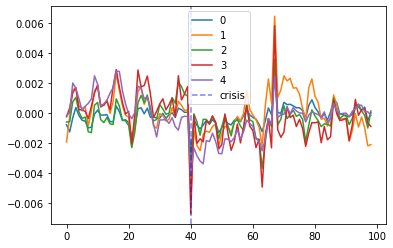

In [26]:
def indexes(iterable, obj):
    return (index for index, elem in enumerate(iterable) if elem == obj)


groups = []
for group in range(5):
    
    temp = array_data_cut_diff[list(indexes(clusters_cut_diff.tolist(), group))]
    series = np.mean(temp,axis=0)
    plt.plot(series, label = str(group))
    groups.append(series)

#plt.plot(MovingAverage(Norm01(first_overall_consuption[first_overall_consuption['group']=="food"]['PRC_AMT'][50:150])[0], numb = 20)\
#    ,label = 'food'\
#    ,linewidth=2, color='red')

plt.axvline(x=40, color='b', ls='--', alpha=0.5, label='crisis')
plt.legend()
plt.show()

In [30]:
food_overall_diff = np.diff(MovingAverage(Norm01(first_overall_consuption[first_overall_consuption['group']=="food"]['PRC_AMT'][50:150])[0], numb = 20))

data_diff = pd.DataFrame(np.array(groups).T)
data_diff.columns = [str(x) for x in list(data_diff.columns)]
data_diff['overall'] = food_overall_diff

In [32]:
i = 0
for y in list(data_diff.columns)[0:5]:
    print('group - ', i , 'score = ' ,VARTest(data_diff[str(y)],data_diff['overall'])[0], 'lag = ',\
        VARTest(data_diff[str(y)],data_diff['overall'])[1])
    i+=1

c:\Users\Pablo\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


group -  0 score =  57.4933677876015 lag =  48
group -  1 score =  40.40935958477539 lag =  29
group -  2 score =  80.1045238137577 lag =  24
group -  3 score =  49.809106089257966 lag =  46
group -  4 score =  56.21171020734065 lag =  0


In [33]:
#by one vs others
for x in range(5):
    cols  =list(data_diff.columns)[:5]
    cols.pop(x)
    cols = [str(x) for x in cols]
    series = data_diff[cols].mean(axis=1)
    print('group-', x , 'lag = ' ,CrossCorr(data_diff[str(x)],series)[0], 'ccor = ',\
        CrossCorr(data_diff[str(x)],series)[1])
        

group- 0 lag =  30 ccor =  0.5420533430763611
group- 1 lag =  25 ccor =  0.526516105146242
group- 2 lag =  21 ccor =  0.46349852678966597
group- 3 lag =  21 ccor =  0.5006006651576271
group- 4 lag =  26 ccor =  0.4924102184376158


# Another classification

In [2]:
first = pd.read_csv('storage/data_with_groups.csv')
first.group.unique()
first_noduplicates = first.groupby(['REGNUM', 'date', 'group']).sum().reset_index()
first_noduplicates

,REGNUM,date,group,mcc,PRC_AMT
0,913,2020-01-01,food,16321,1424.68
1,913,2020-01-02,food,5814,199.00
2,913,2020-01-02,health,5912,1438.00
3,913,2020-01-02,money,6011,2000.00
4,913,2020-01-03,food,5814,213.00
...,...,...,...,...,...
3469213,4300893,2020-07-17,money,19084,12000.00
3469214,4300893,2020-07-19,health,5912,298.00
3469215,4300893,2020-07-19,money,26144,4600.00
3469216,4300893,2020-07-20,food,5411,1012.70


In [3]:
#make overall consumption
first_overall_consuption = first.groupby(['date', 'group']).sum().reset_index()[['date', 'group', 'PRC_AMT']]
#make for food
df_wide_food=pd.pivot(first_noduplicates[first_noduplicates['group']== 'food'], index=['date'], columns = 'REGNUM',values = 'PRC_AMT').fillna(0) #Reshape from long to wide


## Фичи АН

In [4]:
from Libraries.features import get_features



In [80]:
df_wide_food

REGNUM,913,1490,1879,2021,2079,2213,2765,2996,3918,5062,...,4270640,4277955,4279667,4282458,4283303,4288428,4291012,4295871,4300670,4300893
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1424.68,0.00,0.00,498.00,0.00,0.00,0.0,0.00,99.99,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
2020-01-02,199.00,0.00,0.00,976.72,326.49,4359.42,0.0,1273.40,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
2020-01-03,213.00,1272.43,0.00,1031.99,835.97,5630.93,0.0,0.00,720.52,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
2020-01-04,1313.00,0.00,105.00,229.00,1883.96,912.22,0.0,368.86,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
2020-01-05,1376.36,0.00,99.00,2399.85,0.00,189.00,0.0,0.00,1312.60,0.0,...,297.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,719.81,161.17,536.00,856.00,1376.27,0.00,0.0,576.00,1165.35,0.0,...,562.0,0.00,0.0,0.0,5453.31,40.0,0.0,0.0,53.99,0.0
2020-09-27,0.00,0.00,659.99,1452.44,1626.97,0.00,0.0,117.00,0.00,0.0,...,0.0,639.98,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
2020-09-28,304.90,443.00,1075.34,1719.80,2469.33,0.00,55.0,0.00,470.00,0.0,...,0.0,0.00,0.0,0.0,2207.32,0.0,0.0,0.0,0.00,0.0


In [87]:
regnum = []
noise = []
hurst = []
coent = []
ksent = []
randm = []
for column in df_wide_food.columns.tolist():
    result = get_features(df_wide_food[column].tolist())
    regnum.append(column)
    noise.append(result['noise'])
    hurst.append(result['hurst'])
    coent.append(result['coent'])
    ksent.append(result['ksent'])
    randm.append(result['randm'])


features_dict = {'regnum': regnum, 'noise': noise, 'hurst': hurst, 'coent': coent, 'ksent': ksent, 'randm': randm } 
AN_features = pd.DataFrame(features_dict)


In [89]:

AN_features.to_csv('storage/AN_features.csv')

In [91]:
AN_features = AN_features.set_index('regnum')

In [93]:

AN_features_array = np.array(AN_features)

In [94]:
AN_features_array

array([[-0.03474878,  0.36890932,  8.47115593,  5.61518987,  0.19095214],
       [-0.17801302,  0.26984599,  9.01000216,  4.24215034,  0.44925153],
       [ 0.13514679,  0.35843205,  7.04486105,  6.05264148,  0.13180474],
       ...,
       [ 0.28117136,  0.60838715,  6.98849751,  4.51052244,  0.3248821 ],
       [ 0.08457504,  0.6387783 ,  7.27801957,  5.54479339,  0.20940404],
       [ 0.03118783,  0.72025685,  8.17678147,  2.50860625,  0.49082187]])

### KNN

In [95]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)

model.fit(AN_features_array)

clusters_AN_Kmeans = model.predict(AN_features_array)



In [96]:
Counter(clusters_AN_Kmeans)

Counter({3: 2384, 1: 1832, 0: 1636, 4: 386, 2: 1027})

In [98]:
AN_features['cluster'] = clusters_AN_Kmeans

In [100]:
cluster_df = AN_features.reset_index()[['regnum', 'cluster']]

,regnum,cluster
0,913,3
1,1490,1
2,1879,0
3,2021,0
4,2079,0
...,...,...
7260,4288428,4
7261,4291012,4
7262,4295871,1
7263,4300670,0


In [105]:
group = 0
regnums = cluster_df[cluster_df['cluster']==group]['regnum'].tolist()

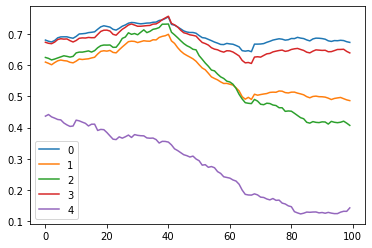

In [170]:
groups = []
for group in range(5):
    regnums = list(cluster_df[cluster_df['cluster']==group]['regnum'])
    series = df_wide_food[regnums].mean(axis=1).tolist()
    series = MovingAverage(Norm01(series)[0], numb = 10)
    plt.plot(series[50:150], label = str(group))
    groups.append(series)
plt.legend()
plt.show()


#### Tests

In [122]:
import copy


In [169]:
#by one vs others
for x in range(5):
    temp_groups = copy.deepcopy(groups)
    series = temp_groups.pop(x).tolist()[50:150]
    rest = np.array(temp_groups).sum(axis=0).tolist()[50:150]
    
    print('group-', x , 'lag = ' ,CrossCorr(series,rest)[0], 'ccor = ',\
        CrossCorr(series,rest)[1])

group- 0 lag =  3 ccor =  0.796089312013465
group- 1 lag =  1 ccor =  0.97299938157081
group- 2 lag =  1 ccor =  0.9505009276437848
group- 3 lag =  1 ccor =  0.8686703772418058
group- 4 lag =  51 ccor =  0.8737755102040814


274

In [152]:
temp_groups.pop(1)

array([0.27615781, 0.4349669 , 0.46984193, 0.49487452, 0.50618881,
       0.51723768, 0.46252102, 0.45614201, 0.40896762, 0.61188783,
       0.68943655, 0.57504351, 0.49056577, 0.49835924, 0.52166913,
       0.51659102, 0.67110742, 0.69302571, 0.59341569, 0.47014624,
       0.49272504, 0.50698784, 0.50359011, 0.7103321 , 0.80086792,
       0.62480158, 0.5265249 , 0.53792503, 0.54645106, 0.55169288,
       0.55378122, 0.56022481, 0.57023347, 0.57485317, 0.5761142 ,
       0.57915864, 0.58229697, 0.57979874, 0.57921676, 0.58726217,
       0.58964029, 0.59014601, 0.58954664, 0.5922609 , 0.58730964,
       0.59110514, 0.5981412 , 0.60426486, 0.60660088, 0.60807666,
       0.60971804, 0.60575102, 0.60115302, 0.60801475, 0.61377822,
       0.61630053, 0.61434449, 0.61324457, 0.60905   , 0.60730548,
       0.61265802, 0.61950118, 0.61801965, 0.61926086, 0.62026282,
       0.62299596, 0.62520844, 0.63558683, 0.64411224, 0.646036  ,
       0.64483702, 0.64705744, 0.64072676, 0.63930872, 0.64918

In [129]:
np.array(temp_groups)

array([[0.34719497, 0.56476413, 0.59675546, ..., 0.65259214, 0.65162593,
        0.65323289],
       [0.27615781, 0.4349669 , 0.46984193, ..., 0.50896422, 0.50728579,
        0.50823157],
       [0.31514442, 0.40544087, 0.43386179, ..., 0.37764836, 0.37356378,
        0.37509872],
       [0.34567409, 0.528719  , 0.61760166, ..., 0.63064538, 0.62726544,
        0.62483208],
       [0.17426612, 0.26850062, 0.26053611, ..., 0.16753052, 0.16827706,
        0.16936977]])

In [134]:
a

array([0.34719497, 0.63436424, 0.64096079, ..., 0.16753052, 0.16827706,
       0.16936977])

In [133]:
a = np.delete(np.array(temp_groups), [1,2,3])

In [49]:
from tsfresh.examples.har_dataset import download_har_dataset, load_har_dataset, load_har_classes
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import settings

In [41]:
df_wide_food

REGNUM,913,1490,1879,2021,2079,2213,2765,2996,3918,5062,...,4270640,4277955,4279667,4282458,4283303,4288428,4291012,4295871,4300670,4300893
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1424.68,0.00,0.00,498.00,0.00,0.00,0.0,0.00,99.99,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
2020-01-02,199.00,0.00,0.00,976.72,326.49,4359.42,0.0,1273.40,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
2020-01-03,213.00,1272.43,0.00,1031.99,835.97,5630.93,0.0,0.00,720.52,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
2020-01-04,1313.00,0.00,105.00,229.00,1883.96,912.22,0.0,368.86,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
2020-01-05,1376.36,0.00,99.00,2399.85,0.00,189.00,0.0,0.00,1312.60,0.0,...,297.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,719.81,161.17,536.00,856.00,1376.27,0.00,0.0,576.00,1165.35,0.0,...,562.0,0.00,0.0,0.0,5453.31,40.0,0.0,0.0,53.99,0.0
2020-09-27,0.00,0.00,659.99,1452.44,1626.97,0.00,0.0,117.00,0.00,0.0,...,0.0,639.98,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0
2020-09-28,304.90,443.00,1075.34,1719.80,2469.33,0.00,55.0,0.00,470.00,0.0,...,0.0,0.00,0.0,0.0,2207.32,0.0,0.0,0.0,0.00,0.0


In [46]:
df_long_food = pd.melt(df_wide_food.reset_index(), id_vars='date', value_vars=df_wide_food.columns.tolist())


In [ ]:
settings_efficient = settings.EfficientFCParameters()
settings_efficient

In [60]:
features_df = extract_features(df_long_food, column_id='REGNUM',column_sort="date", impute_function=impute, default_fc_parameters=settings_efficient)
print(features_df.shape)

Feature Extraction: 100%|██████████| 40/40 [03:44<00:00,  5.61s/it]


(7265, 783)


In [66]:
features_df

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,"value__matrix_profile__feature_""min""__threshold_0.98","value__matrix_profile__feature_""max""__threshold_0.98","value__matrix_profile__feature_""mean""__threshold_0.98","value__matrix_profile__feature_""median""__threshold_0.98","value__matrix_profile__feature_""25""__threshold_0.98","value__matrix_profile__feature_""75""__threshold_0.98",value__mean_n_absolute_max__number_of_maxima_7
913,1.0,0.0,1.0,1.0,222103.18,3.551981e+08,851.002711,-5.218608,-0.194430,679.000,...,5.277720,5.521789,0.0,1.030569,3.548021,2.343192,2.381302,1.970378,2.750246,3655.168571
1490,1.0,0.0,1.0,1.0,166221.44,4.149439e+08,735.293114,0.000000,0.000000,314.545,...,5.043144,5.357854,0.0,0.990265,3.754970,2.741741,2.765716,2.406220,3.157489,4540.915714
1879,1.0,0.0,1.0,1.0,102479.49,8.085628e+07,373.492894,0.000000,-0.485294,266.440,...,5.315058,5.518569,0.0,0.788345,2.428468,1.613044,1.612647,1.348485,1.861277,1784.228571
2021,1.0,0.0,1.0,1.0,311995.42,5.600891e+08,829.015165,-1.824176,-1.578529,1101.205,...,5.313113,5.528914,0.0,1.030569,3.548021,2.343192,2.381302,1.970378,2.750246,3836.144286
2079,1.0,0.0,1.0,1.0,368877.08,8.751831e+08,1220.948864,0.000000,-2.386838,1158.500,...,5.356286,5.552825,0.0,0.925926,2.620172,1.866366,1.866619,1.660032,2.152555,5043.598571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288428,1.0,0.0,1.0,1.0,37087.65,5.361949e+07,209.077289,0.000000,0.000000,0.000,...,2.711979,3.007784,0.0,1.141988,5.248029,3.479374,3.381399,2.511891,4.663522,2374.114286
4291012,1.0,0.0,1.0,1.0,6807.64,8.893104e+06,29.847326,0.000000,0.000000,0.000,...,0.447782,0.502959,0.0,1.848149,5.291503,5.032402,5.291503,5.291503,5.291503,972.520000
4295871,1.0,0.0,1.0,1.0,108270.13,1.157142e+08,292.937656,0.000000,0.000000,126.750,...,4.033691,4.279863,0.0,2.237698,8.000000,5.287536,5.195791,4.887836,5.640287,1947.468571
4300670,1.0,0.0,1.0,1.0,118375.73,1.158071e+08,399.730183,0.000000,-0.913805,292.735,...,4.946330,5.117749,0.0,0.880856,4.472136,2.033524,1.792966,1.551484,2.056468,2053.097143


In [62]:
features_array = np.array(features_df)

In [65]:
features_array.shape

(7265, 783)

### Kmeans


In [68]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)

model.fit(features_array)

clusters_Kmeans = model.predict(features_array)



In [75]:
Counter(clusters_Kmeans)

Counter({0: 7259, 3: 1, 4: 3, 1: 1, 2: 1})

### Agglomerative Clustering


In [76]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
clusters_aglo = model.fit_predict(features_array)


In [77]:
Counter(clusters_aglo)

Counter({0: 7259, 4: 1, 1: 3, 3: 1, 2: 1})

### DBSCAN

In [78]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.30, min_samples=9)
clusters_dbscan = model.fit_predict(features_array)
Counter(clusters_dbscan)


Counter({-1: 7265})